# Fundamentals of Data Analytics - Project

## Loading the Tips Dataset

In [1]:
import seaborn as sns
sns.set(style="darkgrid") 
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")

## Description of the Tips Dataset

The tips dataset is built into the Seaborn python package and is used in the seaborn tutorial for examples of the many plotting features in the seaborn package. 

In [9]:
print('The tips dataset has ' + str(tips.shape[0]) + ' rows and ' + str(tips.shape[1]) + ' columns.')

The tips dataset has 244 rows and 7 columns.


The columns are total_bill, tip, sex, smoker, day, time and size.

In [2]:
cols = tips.columns # get the tips columns
cols

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

Each row of the dataset has an entry in the aforementioned columns. The total_bill column is the amount of  money spent on food/beverages. The tip column is the amount of tip given for the total bill. 
The sex column denotes the sex of the person paying the bill. I find this column a little unusual as it's so black and white. There are no instances of a party splitting the bill which is a common occurance.
The day column denotes the day of the week. 
The time column denotes the time of the dining sitting. 
The size column denotes the size of the dining party. 
The smoker column denotes the classification of the dining party as smoking or non smoking. Presumably this means that a member/members of the party was a smoker and the party was seated in the smoking section. This is not clear from the dataset. 

#### Check for missing Data
As you can see below, there is no missing data in the dataset i.e. no Nan or null values.

In [11]:
print(tips.isnull().sum()) # Adapted from https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/ [1]
print(tips.isna().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [5]:
tips.head() # show the top 5 rows

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.tail() # show the last 5 rows

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [4]:
tips.describe()  # a description of the numeriacl columns

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [71]:
tips.groupby('day').describe() # description of tips grouped by day, adapted from Reference [2]

total_bill                                                             \
          count       mean       std   min      25%    50%      75%    max   
day                                                                          
Thur       62.0  17.682742  7.886170  7.51  12.4425  16.20  20.1550  43.11   
Fri        19.0  17.151579  8.302660  5.75  12.0950  15.38  21.7500  40.17   
Sat        87.0  20.441379  9.480419  3.07  13.9050  18.24  24.7400  50.81   
Sun        76.0  21.410000  8.832122  7.25  14.9875  19.63  25.5975  48.17   

       tip            ...                 size                                \
     count      mean  ...     75%    max count      mean       std  min  25%   
day                   ...                                                      
Thur  62.0  2.771452  ...  3.3625   6.70  62.0  2.451613  1.066285  1.0  2.0   
Fri   19.0  2.734737  ...  3.3650   4.73  19.0  2.105263  0.567131  1.0  2.0   
Sat   87.0  2.993103  ...  3.3700  10.00  87.0  2.517241  0.819275  1.0  2.0   
Sun   76.0  3.255132  ...  4.0000   6.50  76.0  2.842105  1.007341  2.0  2.0   

                     
      50%  75%  max  
day                  
Thur  2.0  2.0  6.0  
Fri   2.0  2.0  4.0  
Sat   2.0  3.0  5.0  
Sun   2.0  4.0  6.0  

[4 rows x 24 columns]

In [74]:
tips.groupby(['day','time']).describe() # Description of tips grouped by day and time, adapted from [2]

total_bill                                                        \
                 count       mean       std    min      25%     50%      75%   
day  time                                                                      
Thur Lunch        61.0  17.664754  7.950334   7.51  12.4300  16.000  20.2700   
     Dinner        1.0  18.780000       NaN  18.78  18.7800  18.780  18.7800   
Fri  Lunch         7.0  12.845714  2.842228   8.58  11.1250  13.420  14.7000   
     Dinner       12.0  19.663333  9.471753   5.75  12.3525  18.665  23.8825   
Sat  Dinner       87.0  20.441379  9.480419   3.07  13.9050  18.240  24.7400   
Sun  Dinner       76.0  21.410000  8.832122   7.25  14.9875  19.630  25.5975   

                     tip            ...                size            \
               max count      mean  ...    75%    max count      mean   
day  time                           ...                                 
Thur Lunch   43.11  61.0  2.767705  ...  3.400   6.70  61.0  2.459016   
     Dinner  18.78   1.0  3.000000  ...  3.000   3.00   1.0  2.000000   
Fri  Lunch   16.27   7.0  2.382857  ...  2.750   3.48   7.0  2.000000   
     Dinner  40.17  12.0  2.940000  ...  3.625   4.73  12.0  2.166667   
Sat  Dinner  50.81  87.0  2.993103  ...  3.370  10.00  87.0  2.517241   
Sun  Dinner  48.17  76.0  3.255132  ...  4.000   6.50  76.0  2.842105   

                                                
                  std  min  25%  50%  75%  max  
day  time                                       
Thur Lunch   1.073526  1.0  2.0  2.0  2.0  6.0  
     Dinner       NaN  2.0  2.0  2.0  2.0  2.0  
Fri  Lunch   0.577350  1.0  2.0  2.0  2.0  3.0  
     Dinner  0.577350  2.0  2.0  2.0  2.0  4.0  
Sat  Dinner  0.819275  1.0  2.0  2.0  3.0  5.0  
Sun  Dinner  1.007341  2.0  2.0  2.0  4.0  6.0  

[6 rows x 24 columns]

In [78]:
tips.groupby('sex').describe() # description of tips grouped by sex

total_bill                                                         \
            count       mean       std   min    25%    50%    75%    max   
sex                                                                        
Male        157.0  20.744076  9.246469  7.25  14.00  18.35  24.71  50.81   
Female       87.0  18.056897  8.009209  3.07  12.75  16.40  21.52  44.30   

          tip            ...               size                                \
        count      mean  ...   75%   max  count      mean       std  min  25%   
sex                      ...                                                    
Male    157.0  3.089618  ...  3.76  10.0  157.0  2.630573  0.955997  1.0  2.0   
Female   87.0  2.833448  ...  3.50   6.5   87.0  2.459770  0.937644  1.0  2.0   

                       
        50%  75%  max  
sex                    
Male    2.0  3.0  6.0  
Female  2.0  3.0  6.0  

[2 rows x 24 columns]

In [80]:
tips.groupby('smoker').describe() # description of tips grouped by smoker

total_bill                                                           \
            count       mean       std   min     25%    50%     75%    max   
smoker                                                                       
Yes          93.0  20.756344  9.832154  3.07  13.420  17.92  26.860  50.81   
No          151.0  19.188278  8.255582  7.25  13.325  17.59  22.755  48.33   

          tip            ...                size                           \
        count      mean  ...    75%   max  count      mean       std  min   
smoker                   ...                                                
Yes      93.0  3.008710  ...  3.680  10.0   93.0  2.408602  0.810751  1.0   
No      151.0  2.991854  ...  3.505   9.0  151.0  2.668874  1.017984  1.0   

                            
        25%  50%  75%  max  
smoker                      
Yes     2.0  2.0  3.0  5.0  
No      2.0  2.0  3.0  6.0  

[2 rows x 24 columns]

In [101]:
tips.groupby('size').describe() # description of tips grouped by size

total_bill                                                               \
          count       mean       std    min      25%     50%      75%    max   
size                                                                           
1           4.0   7.242500  3.010729   3.07   6.2050   7.915   8.9525  10.07   
2         156.0  16.448013  6.043729   5.75  12.4525  15.370  19.6900  40.55   
3          38.0  23.277632  9.407065  10.33  16.9400  20.365  27.7750  50.81   
4          37.0  28.613514  8.608603  16.49  21.5000  25.890  34.8100  48.33   
5           5.0  30.068000  7.340396  20.69  28.1500  29.850  30.4600  41.19   
6           4.0  34.830000  9.382000  27.05  29.1125  32.050  37.7675  48.17   

        tip                                                          
      count      mean       std   min     25%    50%     75%    max  
size                                                                 
1       4.0  1.437500  0.506516  1.00  1.0000  1.415  1.8525   1.92  
2     156.0  2.582308  0.985501  1.00  2.0000  2.500  3.1450   5.85  
3      38.0  3.393158  1.557344  1.36  2.3575  3.290  3.6825  10.00  
4      37.0  4.135405  1.640668  2.00  3.0000  3.760  5.0700   9.00  
5       5.0  4.028000  1.440111  2.00  3.0000  5.000  5.0000   5.14  
6       4.0  5.225000  1.053170  4.20  4.8000  5.000  5.4250   6.70

In [48]:
print('The number of total bills is ' + str(tips.total_bill.count()) + ', with ' + str(tips.tip.count()) + ' tips.')
print('The average bill is ' + str(tips.total_bill.mean()) + ' and the average tip is ' + str(tips.tip.mean()))
gender = tips.sex.unique() # get the unique values in the sex column
print('The \'sex\' of the person paying the bill is classified as ' + gender[0] + ' or ' + gender[1] + '.')
smoker = tips.smoker.unique() # get the unique values in the smoker column. Should be obvious but just checking.
print('The \'smoker\' status of the party is classified as ' + smoker[0] + ' or ' + smoker[1] + '.')

The number of total bills is 244, with 244 tips.
The average bill is 19.785942622950824 and the average tip is 2.9982786885245902
The 'sex' of the person paying the bill is classified as Female or Male.
The 'smoker' status of the party is classified as No or Yes.


In [50]:
days = tips.day.unique() # find the unique opening days
# find the unique sittings
thur = tips[tips.day == 'Thur'] # DataFrame for Thurday 
thur = thur.time.unique() # unique sittings for Thursday
fri = tips[tips.day == 'Fri'] # DataFrame for Friday
fri = fri.time.unique() # unique sittings for Friday
sat = tips[tips.day == 'Sat'] # DataFrame for Saturday
sat = sat.time.unique() # unique sittings for Saturday
sun = tips[tips.day == 'Sun'] # DataFrame for Sunday
sun = sun.time.unique() # unique sittings for Sunday

print('The restaurant is open the following days : ' + days[0] + 'day, ' + days[1] + 'urday, ' + days[2] + 'sday, and ' + days[3] + 'day.')
print('Thursday opening: ')
print(thur[0] + ' & ' + thur[1])
print('Friday opening: ')
print(fri[0] + ' & ' + fri[1])
print('Saturday opening: ')
print(sat[0])
print('Sunday opening: ')
print(sun[0])


The restaurant is open the following days : Sunday, Saturday, Thursday, and Friday.
Thursday opening: 
Lunch & Dinner
Friday opening: 
Dinner & Lunch
Saturday opening: 
Dinner
Sunday opening: 
Dinner


A table with the sittings :

| Sitting | Thursday | Friday | Saturday | Sunday | 
|---------|----------|--------|----------|--------| 
| Lunch   | X        | X      |          |        | 
| Dinner  | X        | X      | X        | X      | 

#### Means of total bill, tip and size grouped by day and time

In [32]:
means = tips.groupby('day').mean() # Adapted from https://www.youtube.com/watch?foo=bar&v=_T8LGqJtuGc , Wes McKinney: pandas in 10 minutes | Walkthrough [2]
means # The mean total_bill, tip and size grouped by day

,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


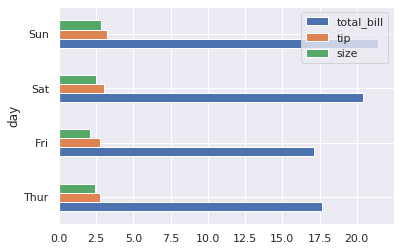

In [33]:
means.plot.barh(); # Adapted from Reference [2] . Horizontal bar plot of mean total_bill, tip and size by day.

In [53]:
means_by_sitting = tips.groupby(['day','time']).mean() # Adapted from Reference [2]
means_by_sitting #  mean total_bill, tip and size grouped by day and time

total_bill       tip      size
day  time                                  
Thur Lunch    17.664754  2.767705  2.459016
     Dinner   18.780000  3.000000  2.000000
Fri  Lunch    12.845714  2.382857  2.000000
     Dinner   19.663333  2.940000  2.166667
Sat  Lunch          NaN       NaN       NaN
     Dinner   20.441379  2.993103  2.517241
Sun  Lunch          NaN       NaN       NaN
     Dinner   21.410000  3.255132  2.842105

As you can see from the table above, there were no lunch sittings on Saturday or Sunday. 

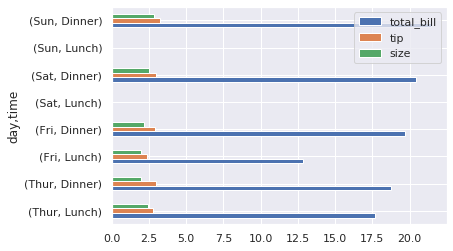

In [37]:
means_by_sitting.plot.barh(); # Horizontal bar plot of  mean total_bill, tips and size grouped by day and time.

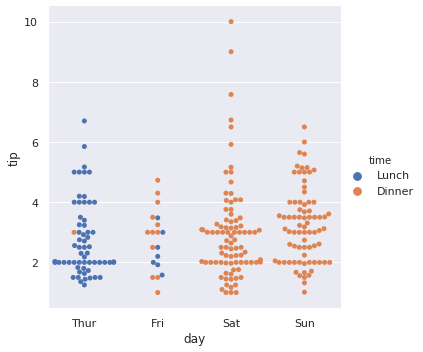

In [66]:
sns.catplot(x="day", y="tip",hue="time", data=tips,kind='swarm'); # A swarmplot of days and tip hued by time. Adapted from https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

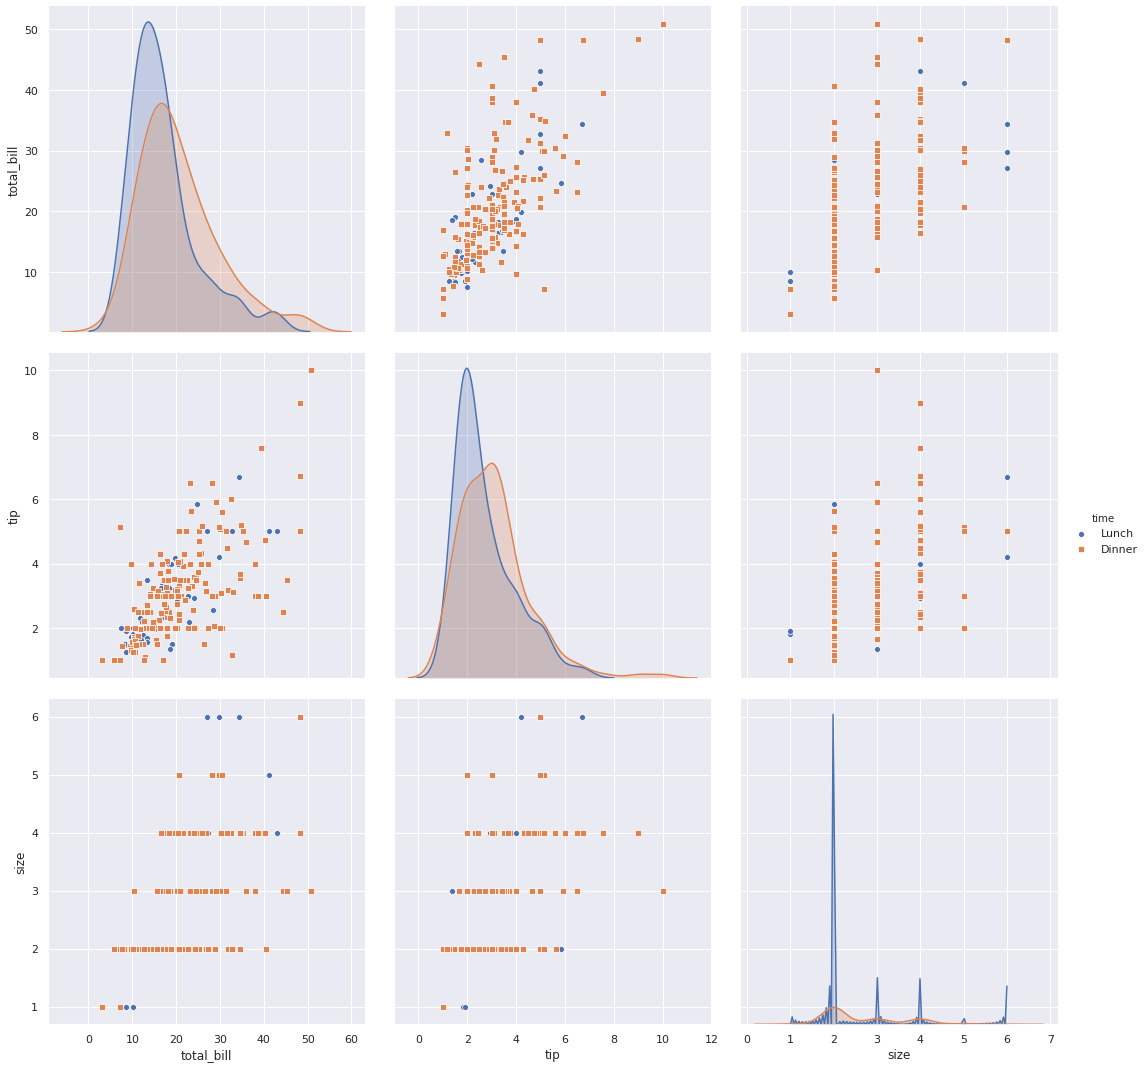

In [96]:
sns.pairplot(tips,hue='time',markers=["o","s"],height=5); # Pariplot of tips with time hued, markers and height increased for better clarity. Adapted from https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot

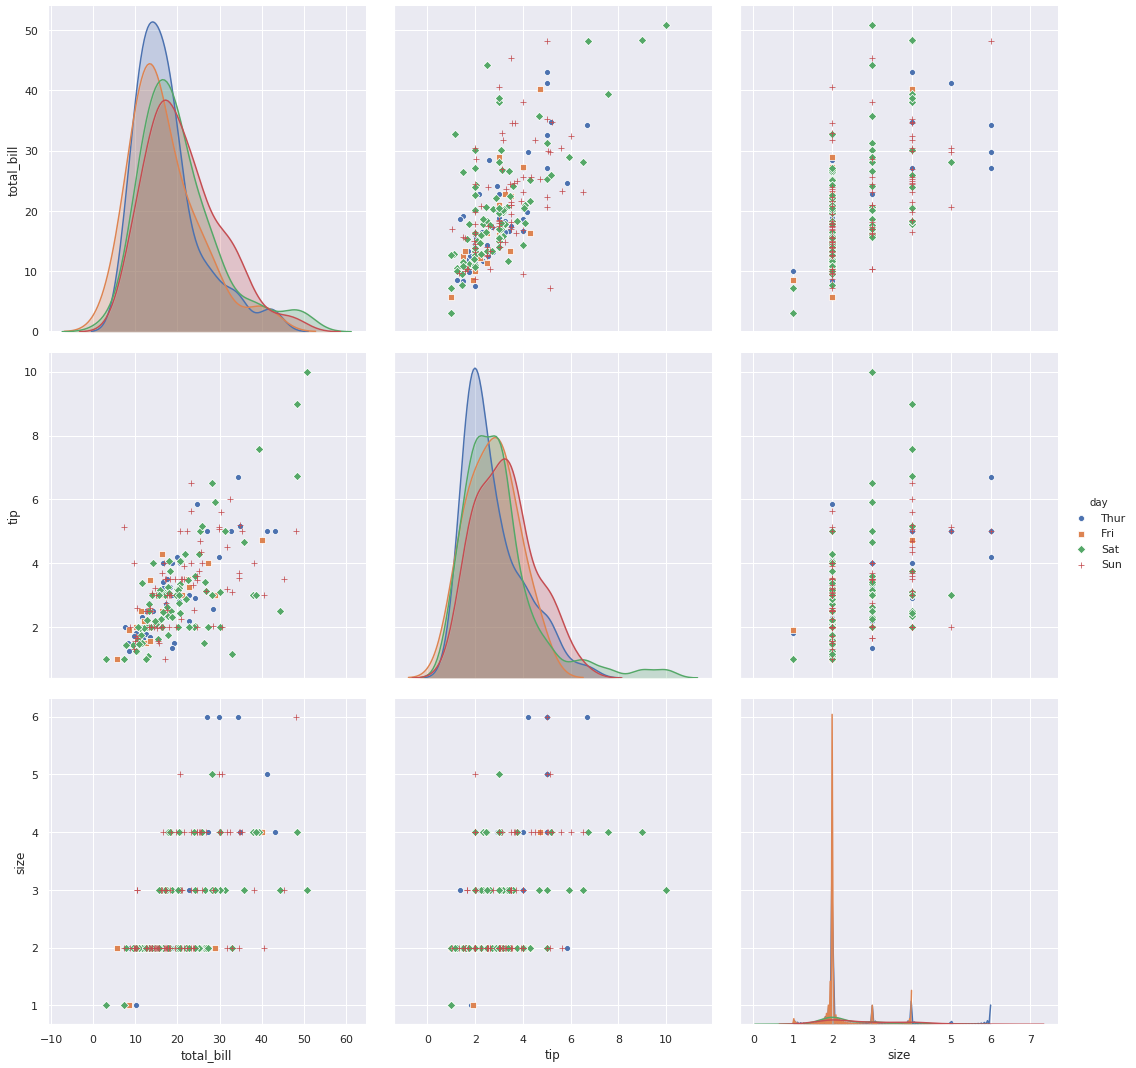

In [98]:
sns.pairplot(tips,hue='day',markers=["o","s","D","+"],height=5); # Pairplot of tips with day hued and height increased. Adapted from https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot

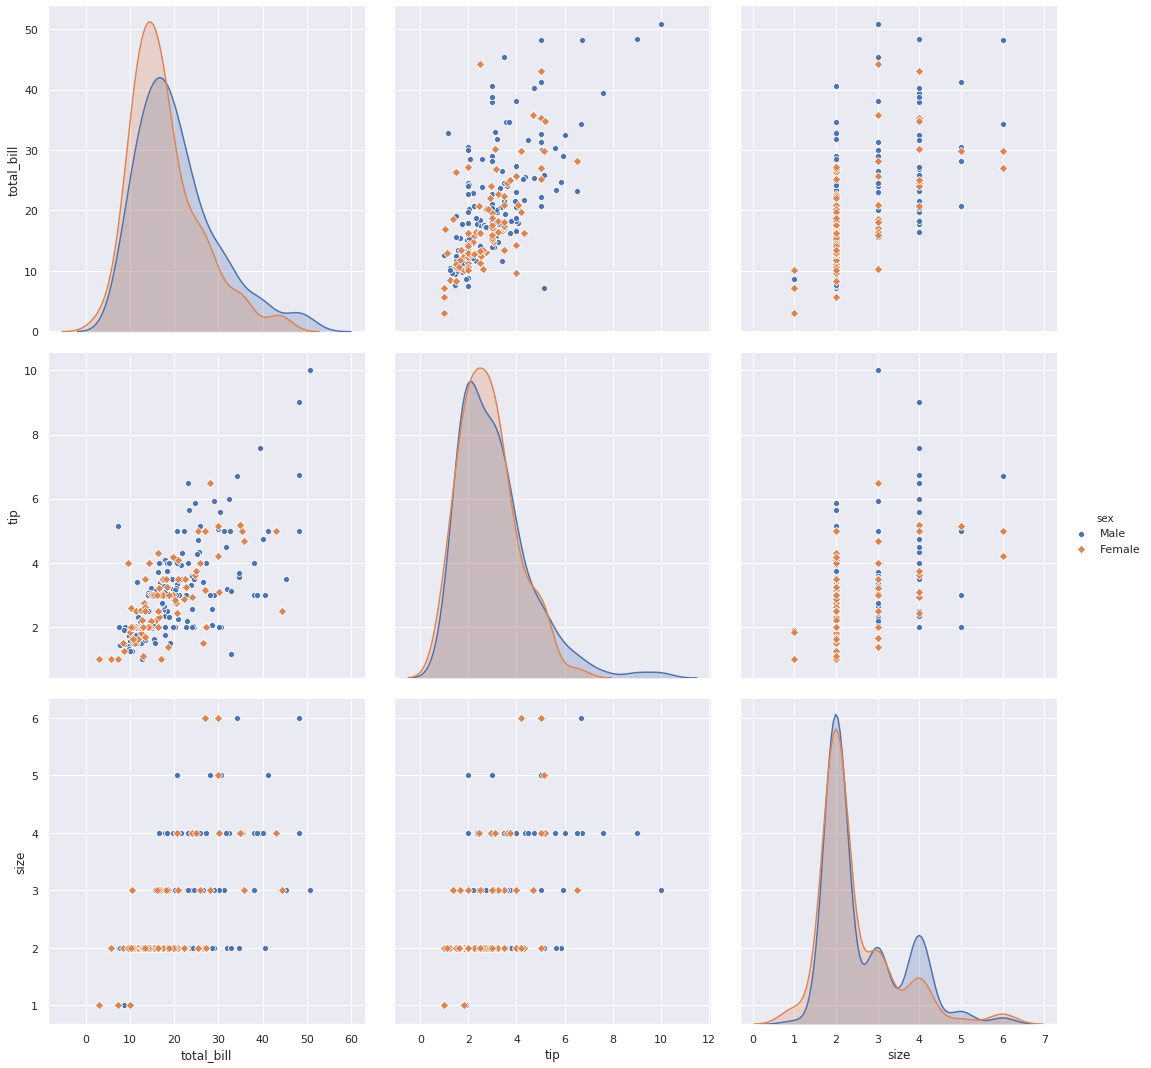

In [99]:
sns.pairplot(tips,hue='sex',markers=["o","D"],height=5);

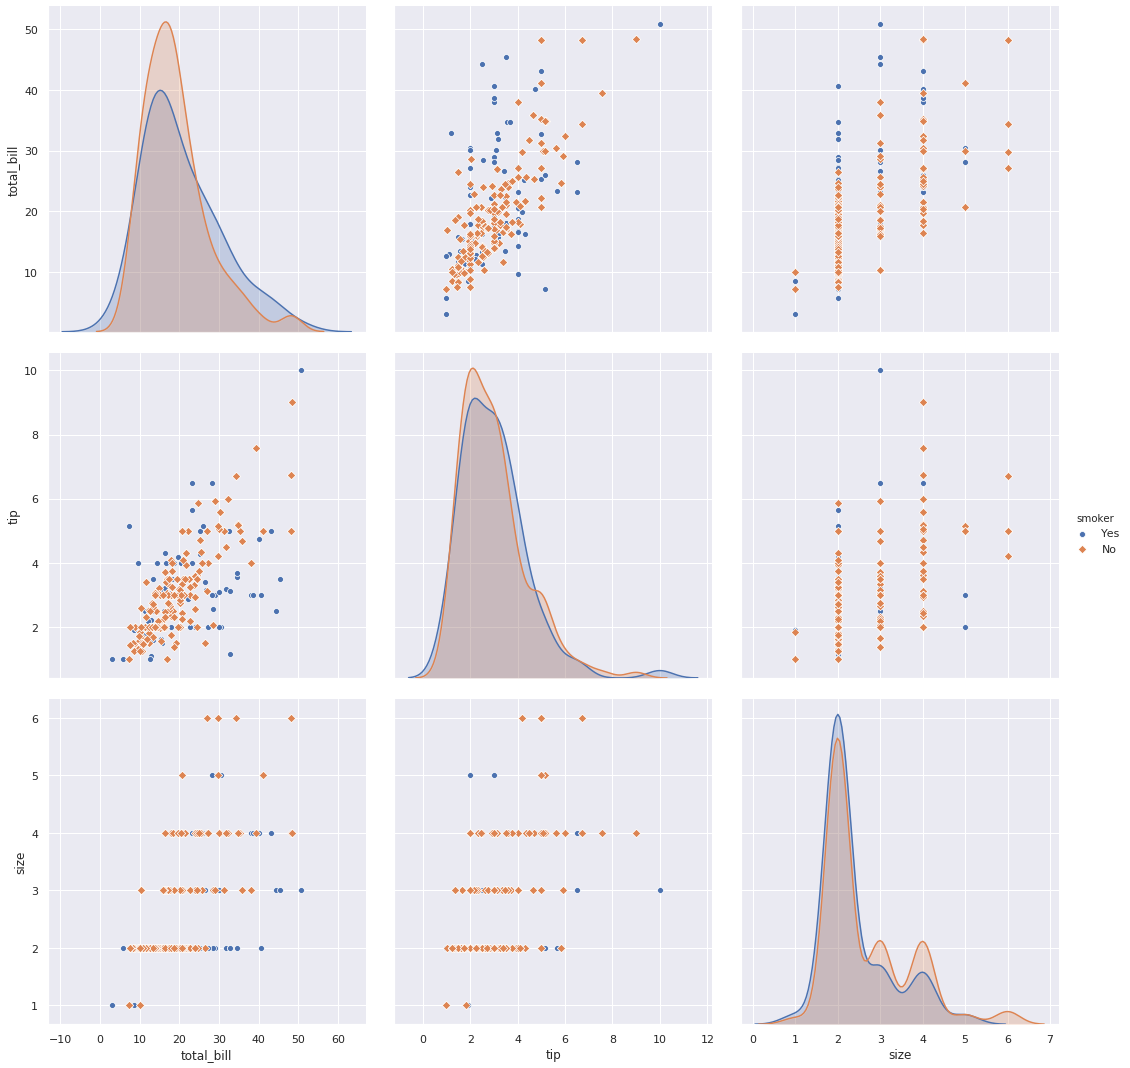

In [100]:
sns.pairplot(tips,hue='smoker',markers=["o","D"],height=5);

In [75]:
tips['size'].min() # The smallest party that was catered for.

1

In [103]:
tips['size'].max() # The largest party that was catered for.

6

In [104]:
tips['size'].unique() # The range of part sizes that was catered for.

array([2, 3, 4, 1, 6, 5])

In [28]:
tips.tip.max() # The maximum tip given.

10.0

In [29]:
tips.tip.min() # The smallest tip given

1.0

In [30]:
tips.total_bill.min() # the smallest bill

3.07

In [77]:
tips.total_bill.max() # the maximum bill

50.81

In [76]:
# Total tips as a % of all bills
(tips.tip.sum()/tips.total_bill.sum())*100

15.153580224410025

In [13]:
# Make a new column with % of tip/bill size
tips['Tipped Percent'] = (tips.tip/tips.total_bill)*100

In [14]:
tips['Tipped Percent'].describe()

count    244.000000
mean      16.080258
std        6.107220
min        3.563814
25%       12.912736
50%       15.476977
75%       19.147549
max       71.034483
Name: Tipped Percent, dtype: float64

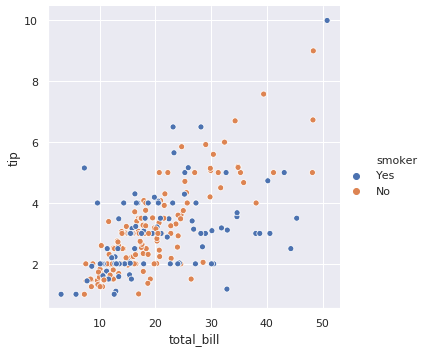

In [40]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

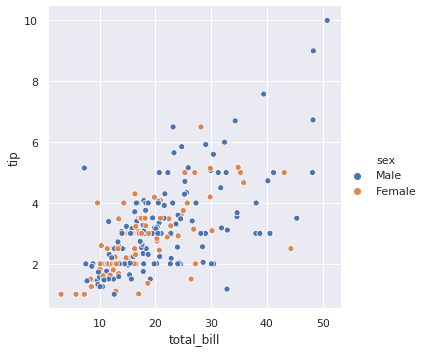

In [41]:
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips);

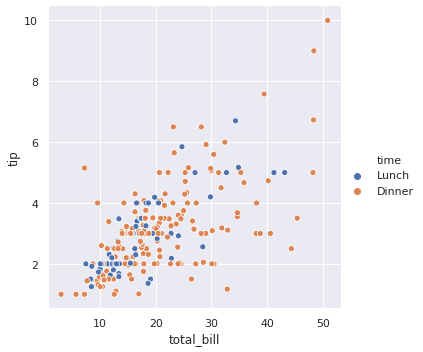

In [42]:
sns.relplot(x="total_bill", y="tip", hue="time", data=tips);

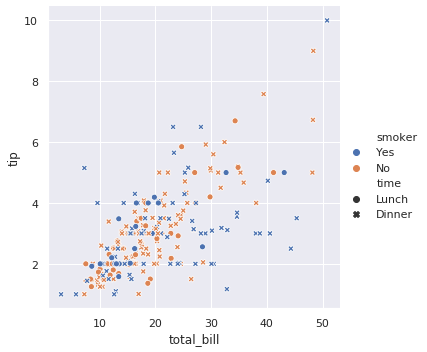

In [43]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

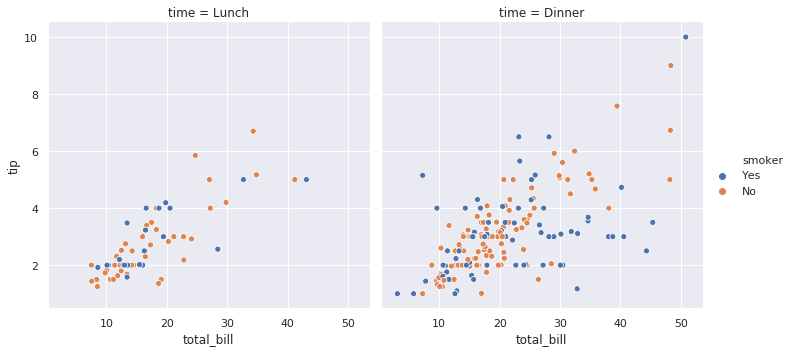

In [44]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

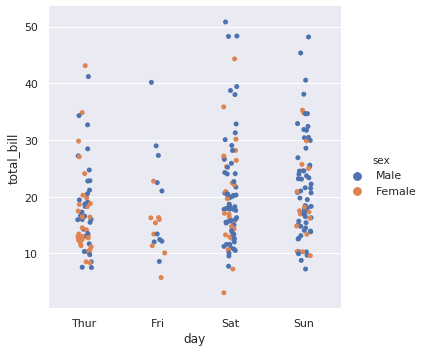

In [53]:
sns.catplot(x="day", y="total_bill",hue="sex", data=tips);

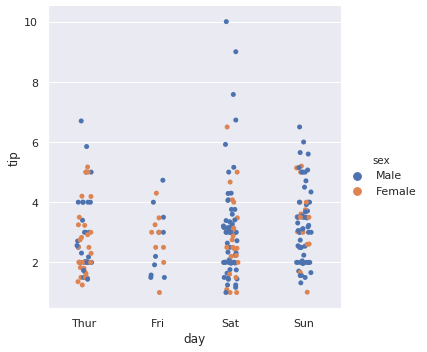

In [52]:
sns.catplot(x="day", y="tip",hue="sex", data=tips);

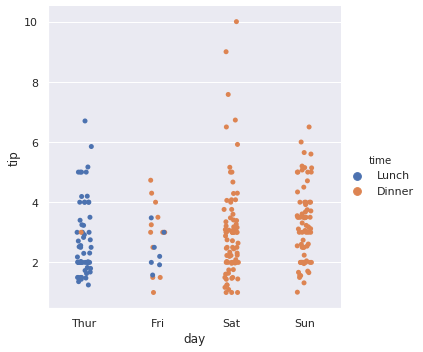

In [54]:
sns.catplot(x="day", y="tip",hue="time", data=tips);

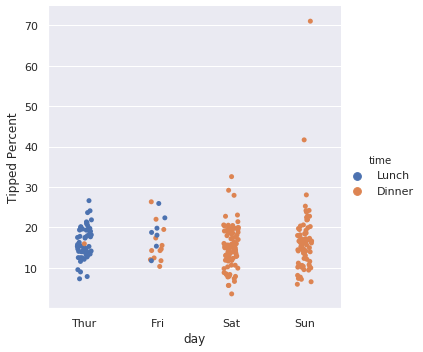

In [105]:
sns.catplot(x="day", y="Tipped Percent",hue="time", data=tips);

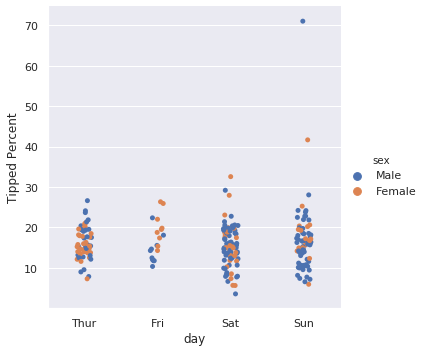

In [106]:
sns.catplot(x="day", y="Tipped Percent",hue="sex", data=tips);

## Grouped by Sittings

In [62]:
thursday = tips[tips.day == 'Thur']
thursday_lunch = thursday[thursday.time == 'Lunch']
thursday_dinner = thursday[thursday.time == 'Dinner']
friday = tips[tips.day == 'Fri']
friday_lunch = friday[friday.time == 'Lunch']
friday_dinner = friday[friday.time == 'Dinner']
saturday = tips[tips.day == 'Sat']
saturday_lunch = saturday[saturday.time == 'Lunch']
satuday_dinner = saturday[saturday.time == 'Dinner']
sunday = tips[tips.day == 'Sun']
sunday_lunch = sunday[sunday.time == 'Lunch']
sunday_dinner = sunday[sunday.time == 'Dinner']

## References

[1] https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/

[2] Wes McKinney: pandas in 10 minutes | Walkthrough - https://www.youtube.com/watch?foo=bar&v=_T8LGqJtuGc